<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/SVM_Regresor_Ascombe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")


In [6]:
data=sns.load_dataset("anscombe")

In [7]:
print(data.shape)
print(data.head(10))
print(data.columns)
print(data.tail())

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


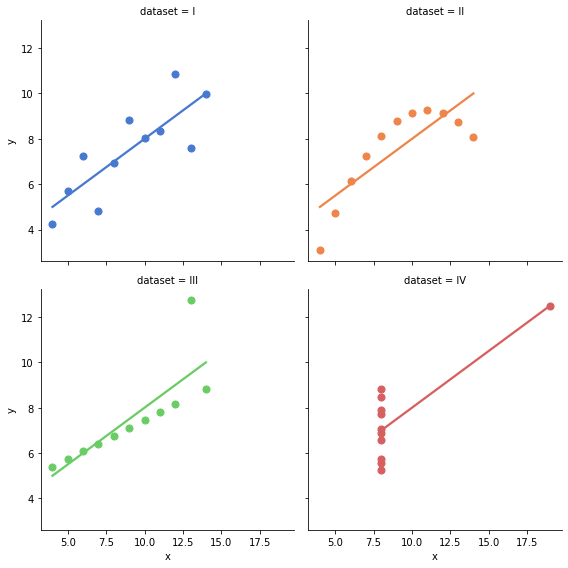

In [10]:
sns.lmplot(
    data=data, x="x",y="y",col="dataset",hue="dataset",
    col_wrap=2,palette="muted",ci=None,
    height=4,scatter_kws={"s":50,"alpha":1}
)

In [12]:
# Separo el dataset 2 para trabajarlo
data2=data[data.dataset=="II"]
data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


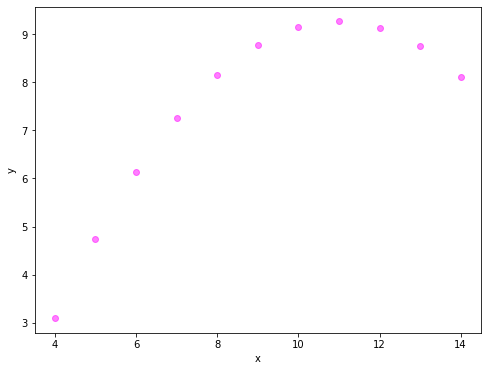

In [26]:
fig=plt.figure(figsize=(8,6))
plt.scatter(data2.x,data2.y,color="magenta",alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()

In [27]:
# Defino las variables predictoras(y) e independiente (x)
y=data2.pop("y") # separo  la columna y
y


11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [29]:
# Estandarizo las caracteristicas
x_train=data2.x.to_frame() # leo como dataframe
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x_train)
y=sc_y.fit_transform(y.values.reshape(-1,1))  # uso values.shape por que "y"es una serie
print(x.shape)
print(y.shape)

(11, 1)
(11, 1)


In [34]:
print(x)



[[ 0.31622777]
 [-0.31622777]
 [ 1.26491106]
 [ 0.        ]
 [ 0.63245553]
 [ 1.58113883]
 [-0.9486833 ]
 [-1.58113883]
 [ 0.9486833 ]
 [-0.63245553]
 [-1.26491106]]


In [35]:
# Hago trabajar el modelo con kernel linear
sv=SVR(kernel="linear")
# Entreno
sv.fit(x,y)

# el resultado es una recta, NO ES EFICIENTE EN ESTE CASO

SVR(kernel='linear')

In [43]:
# Realizo una predicción y grafico
x_nuevo=pd.DataFrame([[4.5],[5.5],[6.5],[7.5],[8.3],[9.5],[10.6],[12.4]])
xt=sc_x.transform(x_nuevo) # no uso fittransform por que uso los valores ya entrenados 
y_pred=sv.predict(xt).reshape(-1,1) # realizo la  prediccion y convierto en un df
print(xt)
print(y_pred)



[[-1.42302495]
 [-1.10679718]
 [-0.79056942]
 [-0.47434165]
 [-0.22135944]
 [ 0.15811388]
 [ 0.50596443]
 [ 1.0751744 ]]
[[-0.99488392]
 [-0.73676726]
 [-0.47865061]
 [-0.22053396]
 [-0.01404063]
 [ 0.29569935]
 [ 0.57962767]
 [ 1.04423765]]


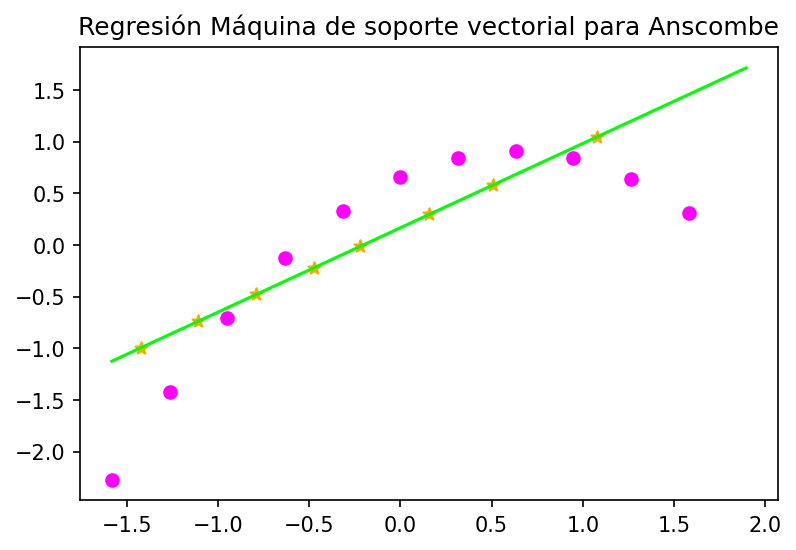

 No es una regresion eficiente


In [48]:
x_vect=np.arange(4.,15.,0.01) # vector de numpy, No de pandas
x_graf=x_vect.reshape(len(x_vect),1) # ahora es un df de 1 columna
xg=sc_x.transform(x_graf)
# Armo el grafico
plt.figure(dpi=150) # abro la figura
plt.scatter(x,y,c="magenta")
plt.plot(xg,sv.predict(xg),color="lime")  # id predicción
plt.scatter(xt,y_pred,color="orange",marker="*")
plt.plot()
plt.title(f"Regresión Máquina de soporte vectorial para Anscombe")
plt.xlabel="x"
plt.ylable="y"
plt.show()
plt.close()

print(" No es una regresion eficiente")

In [49]:
# Veo el score
print("\n")
print(f"Presición:{sv.score(x,y)}")



Presición:0.6384728024535903


In [65]:
# Pruebo con otro kernel
sv1=SVR(kernel="rbf",gamma=0.9)
#entreno
sv1.fit(x,y)

SVR(gamma=0.9)

In [66]:
# Realizo nuevamente una predicción y grafico

y_pred1=sv1.predict(xt).reshape(-1,1) # realizo la  prediccion y convierto en un df

print(y_pred1)

[[-1.49585867]
 [-1.08816015]
 [-0.5120162 ]
 [ 0.03559295]
 [ 0.36951638]
 [ 0.67990979]
 [ 0.80038019]
 [ 0.68095065]]


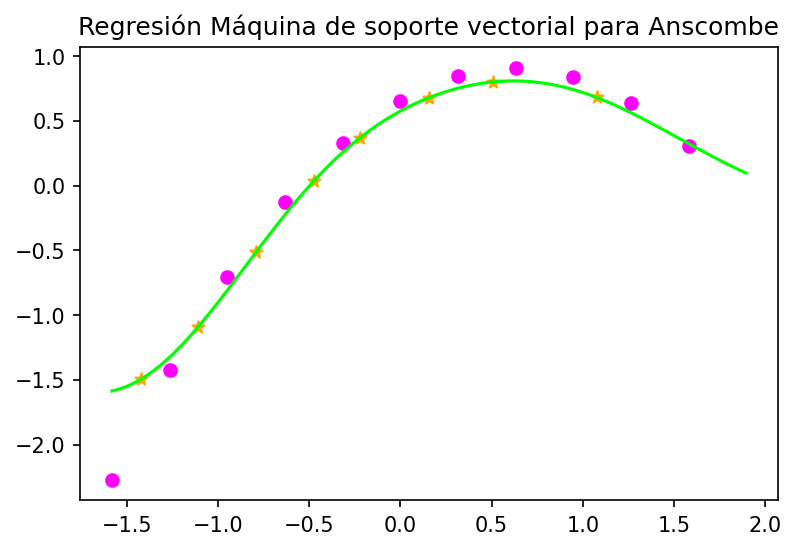

In [67]:
# Armo el grafico

# Armo el grafico
plt.figure(dpi=150) # abro la figura
plt.scatter(x,y,c="magenta")
plt.plot(xg,sv1.predict(xg),color="lime")  # id predicción
plt.scatter(xt,y_pred1,color="orange",marker="*")
plt.plot()
plt.title(f"Regresión Máquina de soporte vectorial para Anscombe")
plt.xlabel="x"
plt.ylable="y"
plt.show()
plt.close()

In [68]:
# Veo el score
print("\n")
print(f"Presición:{sv1.score(x,y)}")



Presición:0.9502195492643883
